In [11]:
import pandas as pd;
import numpy as np

In [4]:
data = pd.read_csv('data/Evaluation-dataset.csv')


In [5]:
print(data.head)

<bound method NDFrame.head of       Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.  \
0      Easy Tyre Selection Process, Competitive Prici...                                                                                                                                                           
1             Very easy to use and good value for money.                                                                                                                                                           
2                  Really easy and convenient to arrange                                                                                                                                                           
3      It was so easy to select tyre sizes and arrang...                                                                  

In [6]:
data.head()


,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = data.iloc[:, :4]
data.columns = ['Text', 'subtheme1', 'subtheme2','subtheme3']
data

,Text,subtheme1,subtheme2,subtheme3
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative
...,...,...,...,...
10126,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive
10127,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN
10128,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive
10129,Excellent service from point of order to fitti...,NaN,NaN,NaN


In [8]:
#nalyze count of each rows words of col Text,do some analysis avg lenghth of text ,max lenght min lenght
data['word_count'] = data['Text'].str.split().str.len()
average_length = data['Text'].str.len().mean()
max_length = data['Text'].str.len().max()
min_length = data['Text'].str.len().min()
print(f" Analysis of sentences \n min Length={min_length}\n max Length={max_length}\n Avg Length={average_length}")

 Analysis of sentences 
 min Length=1
 max Length=3553
 Avg Length=126.48702003750864


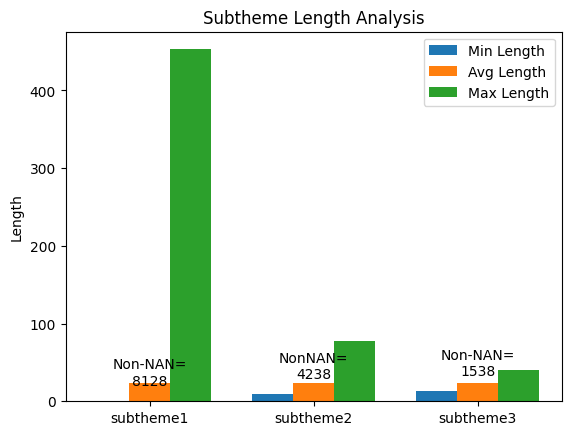

In [12]:
import matplotlib.pyplot as plt
# Calculate the min, max, and average length of each subtheme
subtheme1_lengths = data['subtheme1'].str.len()
subtheme2_lengths = data['subtheme2'].str.len()
subtheme3_lengths = data['subtheme3'].str.len()

min_lengths = [subtheme1_lengths.min(), subtheme2_lengths.min(), subtheme3_lengths.min()]
max_lengths = [subtheme1_lengths.max(), subtheme2_lengths.max(), subtheme3_lengths.max()]
avg_lengths = [subtheme1_lengths.mean(), subtheme2_lengths.mean(), subtheme3_lengths.mean()]

# Count the number of non-NaN values in each subtheme
subtheme1_non_nan_count = data['subtheme1'].notna().sum()
subtheme2_non_nan_count = data['subtheme2'].notna().sum()
subtheme3_non_nan_count = data['subtheme3'].notna().sum()

# Create a bar plot of the min, max, and average length of each subtheme
x_labels = ['subtheme1', 'subtheme2', 'subtheme3']
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(x_labels)) - width, min_lengths, width, label='Min Length')
rects2 = ax.bar(np.arange(len(x_labels)), avg_lengths, width, label='Avg Length')
rects3 = ax.bar(np.arange(len(x_labels)) + width, max_lengths, width, label='Max Length')

# Add labels and title
ax.set_ylabel('Length')
ax.set_title('Subtheme Length Analysis')
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.legend()
# Add annotations for non-NaN values
ax.annotate(f'Non-NAN=\n{subtheme1_non_nan_count}', xy=(0, min_lengths[0] + 20), ha='center')
ax.annotate(f'NonNAN=\n{subtheme2_non_nan_count}', xy=(1, min_lengths[1] + 20), ha='center')
ax.annotate(f'Non-NAN=\n{subtheme3_non_nan_count}', xy=(2, min_lengths[2] + 20), ha='center')

plt.show()

In [13]:
def remove_sentiment_word(sentence):
    words = sentence.split()
    # Check if the last word is a sentiment word
    sentiment_words = ['positive', 'negative', 'neutral']
    if words[-1].lower() in sentiment_words:
        # Remove the last word
        modified_sentence = ' '.join(words[:-1])
        return modified_sentence
    else:
        # No sentiment word found, return the original sentence
        return sentence

In [19]:
import matplotlib.patches as patches
import random
for i in random.sample(range(data.shape[0]),10):
  text = data['Text'].iloc[i]
  subthemes = [data['subtheme1'].iloc[i], data['subtheme2'].iloc[i], data['subtheme3'].iloc[i]]
  colors = ['yellow', 'green', 'blue']
  print(f" index {i}--{text}\n {subthemes}")
  print("________________________________________________________________________")

 index 8017--Can’t give a better review I am afraid. I booked to have my new tyres fitted on Thursday for the following Tuesday at my local ATS. I was given a choice of fitting times and dates and regular updates on my appointment. Only when I arrived at the garage have taken time off work was I told the tyres hadn’t arrived. Come on - that is not acceptable ! To be fair ATS were great, and booked me in promptly when then tyres finally did arrive but it was a cock up before that.
 ['delivery punctuality negative', 'garage service positive', nan]
________________________________________________________________________
 index 8475--Having had a quote from the Service Station I use for car servicing, MOTs, etc. for two new tyres (termed as 'medium budget' tyres) I trawled the internet for alternatives and found well known brand tyres at a lower price via [REDACTED].
 ['value for money positive', nan, nan]
________________________________________________________________________
 index 7962

In [20]:
uniques1=data['subtheme1'].reset_index(drop=True).tolist()
uniques2=data['subtheme2'].reset_index(drop=True).tolist()
uniques3=data['subtheme3'].reset_index(drop=True).tolist()
print(f"length of uniques subtheme in each col\n subtheme1={len(uniques1)}\n subtheme2={len(uniques2)}\n subthemes3={len(uniques3)}")

length of uniques subtheme in each col
 subtheme1=10131
 subtheme2=10131
 subthemes3=10131


In [21]:
uniques=uniques1+uniques2+uniques3

In [23]:
len(uniques)
print(f"subthem1                                              ||subtheme2                                              ||subtheme3")
print("---------------------------------------------------------------------------------------------------------------------------")
for i in range(10):
    print(f"{uniques1[i]}                           {uniques2[i]}                                           {uniques3[i]}")

subthem1                                              ||subtheme2                                              ||subtheme3
---------------------------------------------------------------------------------------------------------------------------
garage service positive                           value for money positive                                           nan
value for money positive                           nan                                           nan
ease of booking positive                           nan                                           nan
location positive                           value for money positive                                           ease of booking positive
length of fitting positive                           ease of booking positive                                           ease of booking negative
garage service positive                           value for money positive                                           nan
value for money positive    

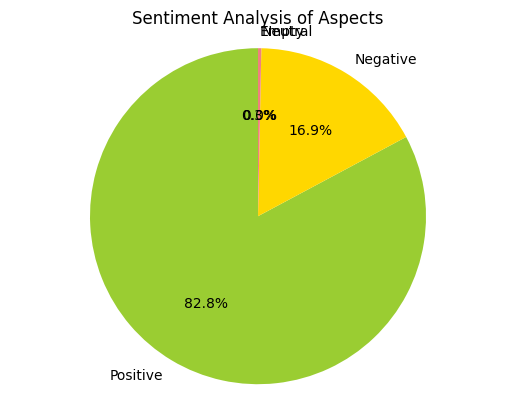

Positive aspects: 11515
Negative aspects: 2345
Neutral aspects: 0
Empty aspects: 44
Total aspects: 13904


In [24]:
pos_asp=[]
neg_asp=[]
empty_asp=[]
aspects = uniques
positive_count = 0
negative_count = 0
neutral_count = 0
empty_count = 0

for aspect in aspects:
    words = str(aspect).split()
    if len(words) > 0 and str(aspect)!='nan':
        sentiment = words[-1].lower()
        if sentiment == 'positive':
            positive_count += 1
            pos_asp.append(remove_sentiment_word(str(aspect)))
        elif sentiment == 'negative':
            negative_count += 1
            neg_asp.append(remove_sentiment_word(str(aspect)))
        elif sentiment == 'neutral':
            neutral_count += 1
        else:
            empty_count += 1
            empty_asp.append(str(aspect))

labels = ['Positive', 'Negative', 'Neutral', 'Empty']
sizes = [positive_count, negative_count, neutral_count, empty_count]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sentiment Analysis of Aspects')
plt.axis('equal')
plt.show()

print(f"Positive aspects: {positive_count}")
print(f"Negative aspects: {negative_count}")
print(f"Neutral aspects: {neutral_count}")
print(f"Empty aspects: {empty_count}")
print(f"Total aspects: {positive_count+negative_count+empty_count+neutral_count}")

In [26]:
import matplotlib.pyplot as plt

def combine_unique_strings_with_counts(list1, list2, list3):
    """Combines three lists of strings into a new dictionary containing unique strings as keys and their counts as values.

    Args:
        list1 (list): The first list of strings.
        list2 (list): The second list of strings.
        list3 (list): The third list of strings.

    Returns:
        dict: A dictionary where keys are unique strings from the three input lists and values are their corresponding counts.

    Raises:
        TypeError: If any of the input lists are not of type list.
        ValueError: If any of the input lists contain non-string elements.
    """

    if not all(isinstance(l, list) for l in (list1, list2, list3)):
        raise TypeError("Input lists must be of type list.")

    for l in (list1, list2, list3):
        if not all(isinstance(s, str) for s in l):
            raise ValueError("Input lists must contain only strings.")

    combined_list = list1 + list2 + list3
    unique_counts = {s: combined_list.count(s) for s in set(combined_list)}

    return unique_counts

unique_counts = combine_unique_strings_with_counts(pos_asp, neg_asp, empty_asp)
# Plot the bar chart
unique_strings = list(unique_counts.keys())
unique_counts_list = list(unique_counts.values())
print(f"Length of unique aspect: {len(unique_counts)}")

Length of unique aspect: 76


In [27]:
one={key: value for key, value in unique_counts.items() if value ==1}
one,len(one)


({' simple to use website': 1,
  ' wide choice of tyres at great prices including delivery and fitting.': 1,
  ' slick delivery service and good fitter.': 1,
  ' the process was simple and quick.Regular offers make it easy to find premium tyres at decent prices.': 1,
  ' ability to browse through various makes of tyres before making a decision': 1,
  ' telephone help avaiable if required.': 1,
  " one tyre with dangerously low air pressure. Asked the garage to top up the tyre and check the other three. They did top up the one tyre but didn't bother to check the others. When I checked the tyres 10 minutes later all four tyres had varying pressures (from 29 to 37.5). I emailed both companies and have not received an apology from either. I will never use Lavender Motors again (they shouldn't be in business) and likely not [REDACTED].com either.": 1,
  ' great price.': 1,
  ' good range and competitive prices on website': 1,
  ' the site is easy to use': 1,
  ' easily navigable web site': 

In [28]:
more_one={key: value for key, value in unique_counts.items() if value >1}
len(more_one),more_one


(32,
 {'facilities': 39,
  'location': 1061,
  'failed payment': 4,
  'garage service': 2359,
  'discounts': 135,
  'ease of booking': 1360,
  'refund not actioned': 14,
  'delivery punctuality': 668,
  'refund': 43,
  'extra charges': 117,
  'no stock': 35,
  "mobile fitter didn't arrive": 8,
  'change of time': 39,
  'discount not applied': 9,
  'incorrect tyres sent': 64,
  'length of fitting': 719,
  'mobile fitter': 244,
  'booking confusion': 105,
  'value for money': 4828,
  'advisoragent service': 324,
  'advisor/agent service': 231,
  'tyre age/dot code': 9,
  'tyre agedot code': 8,
  'damage': 115,
  'refund timescale': 10,
  'call wait time': 21,
  'tyre quality': 459,
  'wait time': 371,
  'late notice': 65,
  'change of date': 270,
  'balancing': 33,
  'response time': 93})